In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys 
sys.path.append("../src/RGE")

In [3]:
from scipy.stats import gaussian_kde

In [4]:
from GW_bubbles_LVV22 import spectrum_bubbles, f_peak_today

In [5]:
%run ../startup.py

📊 Plot style: using ps.apply_standard_formatting
✅ startup.py loaded: numpy, scipy, matplotlib, and project modules are ready.
   Use new_figure() to create pre-formatted plots.


In [6]:
# Cargar los datos
data = np.loadtxt("../data/other_data/NG15.dat")  # ajusta la ruta al archivo
# Extraer y transformar

logfreqs = data[:, 0]
freqs = 10**logfreqs
logsamples = data[:, 1:]
samples = 10**logsamples  # transformar a escala real para log-log

In [7]:
# Tn_HT, aHT, bHT =   0.0097365739682701849465855929071159136, 106058.62591864992, 42.4632320084728
# Tn_1L_LO, a_1L_LO, b_1L_LO  = 0.0086573633563128230526841952325370435,	169678.99526639713,  41.08396323789999 
# Tn_1L_NLO, a_1L_NLO, b_1L_NLO  = 0.01234748933695380324312750541603358,	41006.81387915931,  44.37596924825475
# Tn_2L_M1, a_2L_M1, b_2L_M1 = 0.0093986658171368631633154180462564643,	122153.47733723525, 43.14660424669535
# Tn_2L_M2, a_2L_M2, b_2L_M2 = 0.0093148131380904602622414626328156348,	126611.7693659663, 43.045005700118786
Tn_OPA, a_OPA, b_OPA =   0.004925878072664542, 327835.9086007691, 32.186989031401936


In [8]:
# Requiere:
# from GW_universal_LVV22 import from_params as lvv22_from_params
# Tn_..., a_..., b_... ya definidos
# ps.apply_standard_formatting disponible


# === empaqueta tus tripletas bajo etiquetas (las mismas) ===
spectra_params = {

    "OPA":  (Tn_OPA, a_OPA, b_OPA),
    # "4D HT (Daisy)":   (Tn_HT, aHT, bHT),
    # "1-L (LO)": (Tn_1L_LO, a_1L_LO, b_1L_LO),
    # "1-L (NLO)": (Tn_1L_NLO, a_1L_NLO, b_1L_NLO),
    # "2-L (NLO)":  (Tn_2L_M1, a_2L_M1, b_2L_M1),
    # "2-L (Mixed)":  (Tn_2L_M2, a_2L_M2, b_2L_M2),
    
}

# === estilos (igual que antes) ===
plot_styles = {

    "OPA":  {"color": "m", "lw": 3, "ls": "-" },
    # "4D HT (Daisy)":     {"color": "limegreen", "lw": 2.},
    # "1-L (LO)":  {"marker": r"$\ast$", "color": "royalblue", "s": 80},
    # "1-L (NLO)": {"marker": "d", "edgecolor": "navy", "facecolor": "none", "lw": 1.0, "s": 65},
    # "2-L (NLO)":  {"marker": "o", "edgecolor": "#C99E10", "facecolor": "none", "lw": 1.0, "s": 130},
    # "2-L (Mixed)":  {"marker": r"$♡$", "edgecolor": "#8B1E3F", "facecolor": "none", "lw": 1, "s": 80},
    
}

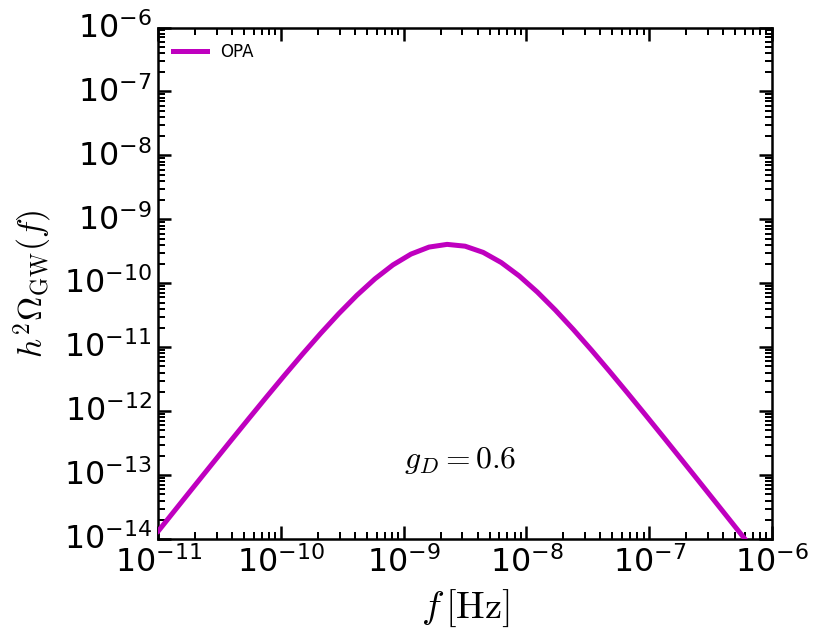

In [9]:


# --- construir SOLO burbujas LVV22 ---
f = np.logspace(-11, -6, 35)
spectra_funcs = {}
for key, (Tn, alpha, betaH) in spectra_params.items():
    spectra_funcs[key] = spectrum_bubbles(
        Tn, alpha, betaH,
        preset_key="bubbles_Rm3",  # gauge
        beta_R_eq=5              # κ(Reff) ~ 0.5; ajusta si quieres más/menos altura
    )

# --- plot ---
fig, ax = plt.subplots(figsize=(7,5.5), dpi=120)
fig.patch.set_facecolor("white")

# # violines NG15 (usa las variables que ya cargaste: freqs, samples)
# labeled = False
# for i in range(len(freqs)):
#     y = samples[i]; y = y[y > 0]
#     if len(y) < 10: continue
#     kde = gaussian_kde(np.log10(y))
#     y_vals = np.linspace(np.log10(y.min()), np.log10(y.max()), 200)
#     dens = kde(y_vals)
#     width = freqs[i] * 0.12
#     dens_scaled = dens / dens.max() * width
#     ax.fill_betweenx(10**y_vals,
#                      freqs[i] - dens_scaled,
#                      freqs[i] + dens_scaled,
#                      alpha=0.12, color="red", zorder=1,
#                      edgecolor="none"
#                      )
#     labeled = True

# curvas
for key, h2func in spectra_funcs.items():
    style = plot_styles[key]
    y = np.array([h2func(fi) for fi in f])
    if "marker" in style:
        ax.scatter(f, y, label=key,
                   marker=style["marker"], s=style.get("s", 35),
                   edgecolor=style.get("edgecolor", None),
                   facecolor=style.get("facecolor", None),
                   lw=style.get("lw", 0.1),
                   color=style.get("color", None),
                   zorder=3)
    else:
        ax.plot(f, y, label=key,
                color=style.get("color", None),
                lw=style.get("lw", 2.),
                ls=style.get("ls", "-"),
                zorder=3)


# etiqueta opcional
ax.text(1e-9, 1e-13, r"$g_D = 0.6$", fontsize=19, ha='left', va='bottom')

# formato
ps.apply_standard_formatting(
    ax,
    xlog=True, ylog=True,
    xlabel=r"$f \,[{\rm Hz}]$",
    ylabel=r"$h^2 \Omega_{\rm GW}(f)$",
    ylim=(1e-14, 1e-6), xlim=(1e-11, 1e-6)
)



ax.legend(loc="upper left", frameon=False, scatterpoints=1, numpoints=1)
plt.tight_layout()
plt.savefig("../plots/GW_RGE_LVV22.pdf", dpi=300, bbox_inches="tight", facecolor="white")


In [28]:
from  GW_RGE_spectrum import GWFromParams   

              


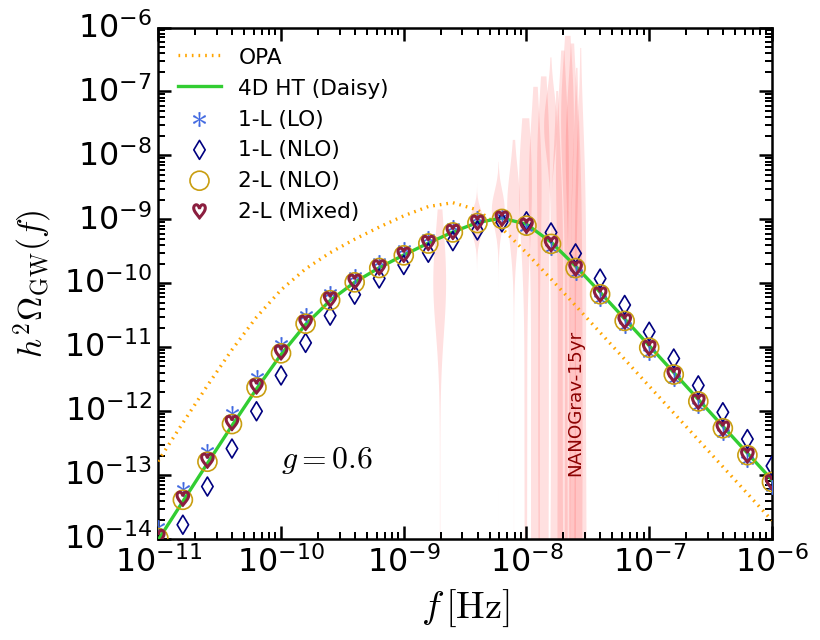

In [10]:

gw = GWFromParams()


# ====================
# (3) Construir funciones
# ====================
f = np.logspace(-14, -6, 41)
spectra_funcs = {}
for key, (Tn, a, b) in spectra_params.items():
    h2_tot, *_ = gw.spectra(Tn, a, b, kappa_col=1.0)
    spectra_funcs[key] = h2_tot

# ====================
# (4) Plot
# ====================
fig, ax = plt.subplots(figsize=(7,5.5), dpi=120)
fig.patch.set_facecolor("white")

# --- violines NG15 ---
for i in range(len(freqs)):
    y = samples[i]
    y = y[y > 0]
    if len(y) < 10:
        continue
    kde = gaussian_kde(np.log10(y))
    y_vals = np.linspace(np.log10(y.min()), np.log10(y.max()), 200)
    dens = kde(y_vals)
    width = freqs[i] * 0.12
    dens_scaled = dens / dens.max() * width
    ax.fill_betweenx(10**y_vals,
                     freqs[i] - dens_scaled,
                     freqs[i] + dens_scaled,
                     alpha=0.12, color="red", zorder=1,
                     edgecolor="none", label="_nolegend_")

# --- curvas GW ---
for key, h2func in spectra_funcs.items():
    style = plot_styles[key]
    y = np.array([h2func(fi) for fi in f])

    if "marker" in style:
        ax.scatter(f, y, label=key,
                   marker=style["marker"],
                   s=style.get("s", 35),
                   edgecolor=style.get("edgecolor", None),
                   facecolor=style.get("facecolor", None),
                   lw=style.get("lw", 0.1),
                   color=style.get("color", None),
                   zorder=3)
    else:
        ax.plot(f, y, label=key,
                color=style.get("color", None),
                lw=style.get("lw", 1.1),
                ls=style.get("ls", "-"),
                zorder=3)

ax.text(1e-10, 1e-13, "$g= 0.6$", fontsize=19, ha='left', va='bottom')
ax.text(2.1e-8, 1e-13, "NANOGrav-15yr", fontsize=11, ha='left', va='bottom', rotation=90, color="darkred",alpha = 1)


# formato
ps.apply_standard_formatting(
    ax,
    xlog=True, ylog=True,
    xlabel=r"$f \,[{\rm Hz}]$",
    ylabel=r"$h^2 \Omega_{\rm GW}(f)$",
    ylim = (1e-14, 1e-6),
    xlim =(1e-11, 1e-6)
)

ax.legend(loc="upper left", frameon=False,
          scatterpoints=1,
          numpoints=1, fontsize=13, ncol = 1)

plt.tight_layout()
plt.savefig("../plots/RGE/GW_g_0_6_mu_piT.pdf",
            dpi=300, bbox_inches="tight", facecolor="white")



In [11]:
Tn_HT, aHT, bHT =   0.0097365739682701849465855929071159136, 106058.62591864992, 42.4632320084728 

Tn_HT1, aHT1, bHT1 =   0.012692660003153515275603246621183014, 36724.9, 45.1427# 0.25 pi T
Tn_HT2, aHT2, bHT2 =     0.0077682031240595002151512839246764620, 261751.,39.9784# 4 pi T


#---------------------
Tn_2L_M1, a_2L_M1, b_2L_M1 = 0.0093986658171368631633154180462564643,	122153.47733723525, 43.14660424669535
Tn_2L_M1_1, a_2L_M1_1, b_2L_M1_1 = 0.0091075566589220541265845859237315900, 138536., 43.0588# 0.25(2pi T )
Tn_2L_M1_2, a_2L_M1_2, b_2L_M1_2 =  0.0092986741430905305721976716881724578, 127493., 43.2115 # 4 (2 pi T)


Tn_OPA, a_OPA, b_OPA = 0.004925878072664542, 327835.9086007691,   32.186989031401936

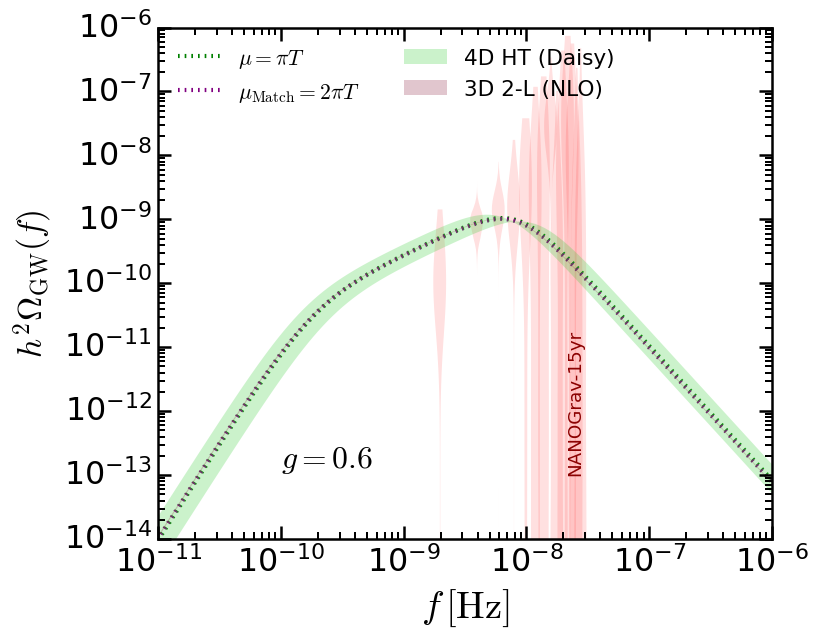

In [12]:
gw = GWFromParams()

# ========= (1) Frecuencia común =========
f = np.logspace(-14, -6, 200)

# ========= (2) Construir las 2 funciones h^2Ω_GW(f) =========
h2_HT, *_ = gw.spectra(Tn_HT, aHT, bHT, kappa_col=1.0)
h2_HT1, *_ = gw.spectra(Tn_HT1, aHT1, bHT1, kappa_col=1.0)
h2_HT2, *_ = gw.spectra(Tn_HT2, aHT2, bHT2, kappa_col=1.0)
h2_2L_M1, *_ = gw.spectra(Tn_2L_M1, a_2L_M1, b_2L_M1, kappa_col=1.0)
h2_2L_M1_1, *_ = gw.spectra(Tn_2L_M1_1, a_2L_M1_1, b_2L_M1_1, kappa_col=1.0)
h2_2L_M1_2, *_ = gw.spectra(Tn_2L_M1_2, a_2L_M1_2, b_2L_M1_2, kappa_col=1.0)

h2_OPA, *_ = gw.spectra(Tn_OPA, a_OPA, b_OPA, kappa_col=1.0)

y = np.array([h2_HT(fi) for fi in f], dtype=float)
y1 = np.array([h2_HT1(fi) for fi in f], dtype=float)
y2 = np.array([h2_OPA(fi) for fi in f], dtype=float)
y3 = np.array([h2_HT2(fi) for fi in f], dtype=float)
y4 = np.array([h2_2L_M1(fi) for fi in f], dtype=float)
y5 = np.array([h2_2L_M1_1(fi) for fi in f], dtype=float)
y6 = np.array([h2_2L_M1_2(fi) for fi in f], dtype=float)


# por si vas con ylog: quita negativos/NaN
m = np.isfinite(y) & (y > 0)
m1 = np.isfinite(y1) & (y1 > 0)
m2 = np.isfinite(y2) & (y2 > 0)
m3 = np.isfinite(y3) & (y3 > 0)
m4 = np.isfinite(y4) & (y4 > 0)
m5 = np.isfinite(y5) & (y5 > 0)
m6 = np.isfinite(y6) & (y6 > 0)

# ========= (3) Plot =========
fig, ax = plt.subplots(figsize=(7,5.5), dpi=120)
fig.patch.set_facecolor("white")

# --- violines NG15 (si los quieres) ---
for i in range(len(freqs)):
    yy = samples[i]
    yy = yy[yy > 0]
    if len(yy) < 10:
        continue
    kde = gaussian_kde(np.log10(yy))
    y_vals = np.linspace(np.log10(yy.min()), np.log10(yy.max()), 200)
    dens = kde(y_vals)
    width = freqs[i] * 0.12
    dens_scaled = dens / dens.max() * width
    ax.fill_betweenx(10**y_vals,
                     freqs[i] - dens_scaled,
                     freqs[i] + dens_scaled,
                     alpha=0.12, color="red", zorder=1,
                     edgecolor="none", label="_nolegend_")

# --- dos curvas, sin ifs ridículos ---
ax.plot(f[m], y[m],
        color="green",
        ls = ':',
        lw=2.5,
        label = r"$\mu =\pi T$"
        )


ax.plot(f[m1], y1[m1],
        color="limegreen",
    
        lw=0.0)

ax.plot(f[m3], y3[m3],
        color="limegreen",
    
        lw=0.0)


ax.plot(f[m4], y4[m4],
        color="purple",
        ls=':',
        lw=2.5,
        label = r"$\mu_{\rm Match} = 2 \pi T$"
        )
ax.plot(f[m5], y5[m5],
        color="purple",
        lw=0.0
          )
ax.plot(f[m6], y6[m6],
        color="purple",
        lw=0.0
          )

mask13 = m1 & m3
lower = np.minimum(y1, y3)[mask13]
upper = np.maximum(y1, y3)[mask13]

mask56 = m5 & m6
lower2 = np.minimum(y5, y6)[mask56]
upper2 = np.maximum(y5, y6)[mask56]

ax.fill_between(
    f[mask13], lower, upper,
    color="limegreen",
    alpha=0.25,
    edgecolor="none",
    zorder=2,
    label="4D HT (Daisy)"
)

ax.fill_between(
    f[mask56], lower2, upper2,
    color="#8B1E3F",
    alpha=0.25,
    edgecolor="none",
    zorder=2,
    label="3D 2-L (NLO)"
)       


ax.text(1e-10, 1e-13, "$g= 0.6$", fontsize=19, ha='left', va='bottom')
ax.text(2.1e-8, 1e-13, "NANOGrav-15yr", fontsize=11, ha='left', va='bottom', rotation=90, color="darkred",alpha = 1)
# formato
ps.apply_standard_formatting(
    ax,
    xlog=True, ylog=True,
    xlabel=r"$f \,[{\rm Hz}]$",
    ylabel=r"$h^2 \Omega_{\rm GW}(f)$",
    ylim = (1e-14, 1e-6),
    xlim =(1e-11, 1e-6)
)

ax.legend(loc="upper left", frameon=False, scatterpoints=1, numpoints=1, ncol = 2, fontsize=13)
plt.tight_layout()
plt.savefig("../plots/RGE/GW_g_0_6_mu_comparison.pdf",
            dpi=300, bbox_inches="tight", facecolor="white")

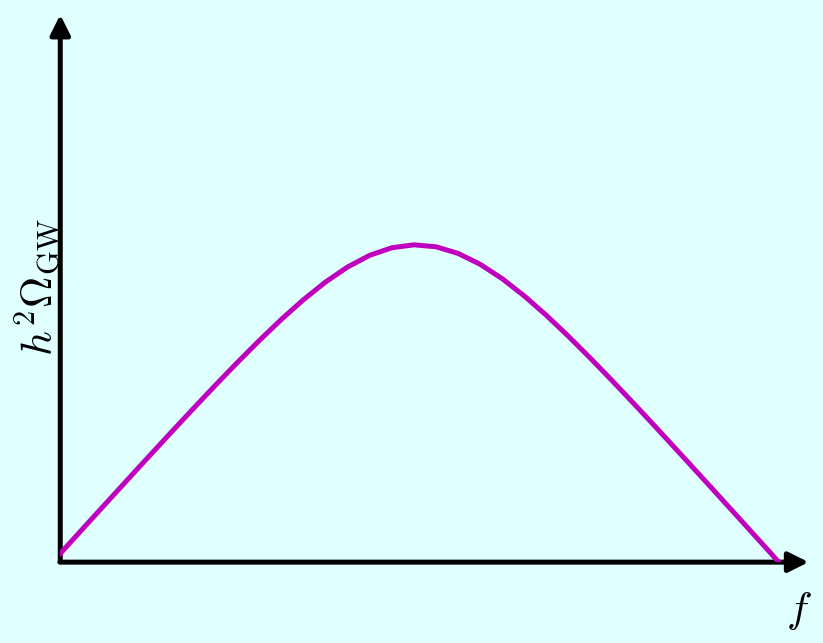

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch

# --- construir SOLO burbujas LVV22 ---
f = np.logspace(-11, -6, 35)
spectra_funcs = {}
for key, (Tn, alpha, betaH) in spectra_params.items():
    spectra_funcs[key] = spectrum_bubbles(
        Tn, alpha, betaH,
        preset_key="bubbles_Rm3",
        beta_R_eq=5
    )

# --- plot ---
fig, ax = plt.subplots(figsize=(7,5.5), dpi=120)
fig.patch.set_facecolor("#e0ffff")
ax.set_facecolor("#e0ffff")

# --- curvas ---
for key, h2func in spectra_funcs.items():
    style = plot_styles[key]
    y = np.array([h2func(fi) for fi in f])
    ax.plot(f, y,
            color=style.get("color", "magenta"),
            lw=style.get("lw", 3.),
            ls=style.get("ls", "-"),
            zorder=3)

# --- formato (log escalas) ---
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-11, 1e-6)
ax.set_ylim(1e-14, 1e-6)

# === limpiar absolutamente todo ===
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(bottom=False, left=False, right=False, top=False)
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.yaxis.set_minor_formatter(plt.NullFormatter())
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())
for spine in ax.spines.values():
    spine.set_visible(False)
if ax.get_legend():
    ax.legend_.remove()
ax.set_xlabel("")
ax.set_ylabel("")

# --- ejes con flechas pegadas al origen ---
arrowprops = dict(arrowstyle="-|>", color="black", lw=3, mutation_scale=25)

# Eje X
ax.add_patch(FancyArrowPatch((-0.005, 0), (1.0, 0),
                             transform=ax.transAxes, **arrowprops, clip_on=False))
# Eje Y
ax.add_patch(FancyArrowPatch((0, -0.005), (0, 1.0),
                             transform=ax.transAxes, **arrowprops, clip_on=False))


# --- etiquetas ---
ax.text(1e-6, 1.e-15, r"$f$", fontsize=26, ha='right', va='bottom')
ax.text(7e-12, 1e-11, r"$h^2\Omega_{\rm GW}$", fontsize=26, rotation=90,
        ha='center', va='bottom')

plt.tight_layout()
plt.savefig("../plots/GW_schematic_arrows_clean2.pdf",
            dpi=300, bbox_inches="tight", facecolor="#e0ffff")
plt.show()



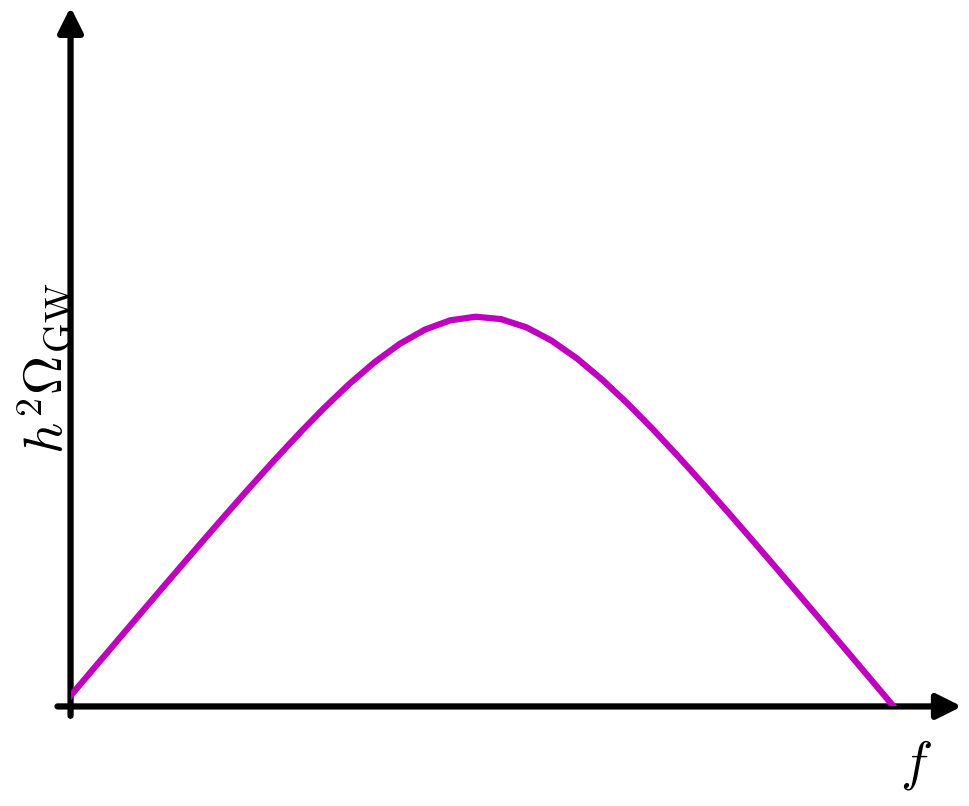

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch

# --- construir SOLO burbujas LVV22 ---
f = np.logspace(-11, -6, 35)
spectra_funcs = {}
for key, (Tn, alpha, betaH) in spectra_params.items():
    spectra_funcs[key] = spectrum_bubbles(
        Tn, alpha, betaH,
        preset_key="bubbles_Rm3",
        beta_R_eq=5
    )

# --- plot ---
fig, ax = plt.subplots(figsize=(7,5.5), dpi=150)

# fondo transparente
fig.patch.set_alpha(0.0)
ax.set_facecolor((1,1,1,0))  # alpha=0

# --- curvas ---
for key, h2func in spectra_funcs.items():
    style = plot_styles[key]
    y = np.array([h2func(fi) for fi in f])
    ax.plot(f, y,
            color=style.get("color", "magenta"),
            lw=style.get("lw", 3.),
            ls=style.get("ls", "-"),
            zorder=3)

# --- formato (log escalas) ---
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-11, 1e-6)
ax.set_ylim(1e-14, 1e-6)

# === limpiar ===
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(bottom=False, left=False, right=False, top=False)
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.yaxis.set_minor_formatter(plt.NullFormatter())
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())
for spine in ax.spines.values():
    spine.set_visible(False)
if ax.get_legend():
    ax.legend_.remove()

# --- ejes con flechas unidas ---
arrowprops = dict(arrowstyle="-|>", color="black", lw=3, mutation_scale=25)
ax.add_patch(FancyArrowPatch((-0.02, 0), (1.04, 0),
                             transform=ax.transAxes, **arrowprops, clip_on=False))
ax.add_patch(FancyArrowPatch((0, -0.02), (0, 1.04),
                             transform=ax.transAxes, **arrowprops, clip_on=False))

# --- etiquetas ---
ax.text(1e-6, 1.e-15, r"$f$", fontsize=26, ha='right', va='bottom')
ax.text(7e-12, 1e-11, r"$h^2\Omega_{\rm GW}$", fontsize=26, rotation=90,
        ha='center', va='bottom')

# --- guardar con fondo transparente ---
plt.subplots_adjust(left=0.08, bottom=0.08)
plt.savefig("../plots/GW_chematic.png",
            dpi=300, bbox_inches="tight", transparent=True)
plt.show()
